In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# File to Load 
EPL_sum_table = "Data/EPL_all_seasons_sum.csv"
EPL_matches_table = "Data/EPL_all_seasons_matches.csv"
LaLiga_sum_table = "Data/LaLiga_all_seasons_sum.csv"
LaLiga_matches_table = "Data/LaLiga_all_seasons_matches.csv"
SerieA_sum_table = "Data/serie_a_seasons_sum.csv"
SerieA_matches_table = "Data/serie_a_all_seasons_matches.csv"
Bundes_sum_table = "Data/Bundes_seasonsdata.csv"
Bundes_matches_table = "Data/combined_bundesliga_matches.csv"
Ligue1_sum_table = "Data/Ligue1_all_seasons_sum.csv"
Ligue1_matches_table = "Data/Ligue1_all_seasons_matches.csv"
UEFA_sum_table = "Data/uefa_all_seasons_sum.csv"
UEFA_matches_table = "Data/uefa_all_seasons_matches.csv"

# Read csv files and store into Pandas DataFrames
EPL_sum_df = pd.read_csv(EPL_sum_table, index_col=0)
EPL_matches_df = pd.read_csv(EPL_matches_table, index_col=0)
LaLiga_sum_df = pd.read_csv(LaLiga_sum_table, index_col=0)
LaLiga_matches_df = pd.read_csv(LaLiga_matches_table, index_col=0)
SerieA_sum_df = pd.read_csv(SerieA_sum_table, index_col=0)
SerieA_matches_df = pd.read_csv(SerieA_matches_table, index_col=0)
Bundes_sum_df = pd.read_csv(Bundes_sum_table, index_col=0)
Bundes_matches_df = pd.read_csv(Bundes_matches_table, index_col=0)
Ligue1_sum_df = pd.read_csv(Ligue1_sum_table, index_col=0)
Ligue1_matches_df = pd.read_csv(Ligue1_matches_table, index_col=0)
UEFA_sum_df = pd.read_csv(UEFA_sum_table, index_col=0)
UEFA_matches_df = pd.read_csv(UEFA_matches_table, index_col=0)

In [ ]:
# Concatenate summary tables into one dataframe
all_leagues_sum_df = pd.concat([EPL_sum_df, LaLiga_sum_df, SerieA_sum_df,
                                Bundes_sum_df, Ligue1_sum_df], axis=0).reset_index(drop=True)
all_leagues_sum_df.info()

In [ ]:
#all_leagues_sum_df[all_leagues_sum_df['L'].isna()]
test_df = all_leagues_sum_df.dropna(how='all',thresh=6)
test_df.info()
#all_leagues_sum_cleaned_df = all_leagues_sum_df['MP'] - all_leagues_sum_df['W'] - all_leagues_sum_df['D']

In [3]:
# Concatenate matches into one dataframe
all_leagues_matches_df = pd.concat([EPL_matches_df, LaLiga_matches_df, SerieA_matches_df,
                                Bundes_matches_df, Ligue1_matches_df, UEFA_matches_df], axis=0).reset_index(drop=True)
all_leagues_matches_df.tail()

,Season,Wk,Date,Time,Home,Away,Home Score,Away Score,xG Home,xG Away,Attendance,Venue,Referee,xG Diff,Actual Diff,League,Round
9762,2021-2022,NaN,2022-04-26,20:00,Manchester City,Real Madrid,4.0,3.0,2.7,1.6,52217.0,Etihad Stadium,István Kovács,1.1,1.0,UEFA,Semi-finals
9763,2021-2022,NaN,2022-04-27,20:00,Liverpool,Villarreal,2.0,0.0,1.6,0.1,51586.0,Anfield,Szymon Marciniak,1.5,2.0,UEFA,Semi-finals
9764,2021-2022,NaN,2022-05-03,21:00,Villarreal,Liverpool,2.0,3.0,1.2,2.5,23665.0,Estadio de la Cerámica,Danny Makkelie,-1.3,-1.0,UEFA,Semi-finals
9765,2021-2022,NaN,2022-05-04,21:00,Real Madrid,Manchester City,3.0,1.0,2.3,1.4,61416.0,Estadio Santiago Bernabéu,Daniele Orsato,0.9,2.0,UEFA,Semi-finals
9766,2021-2022,NaN,2022-05-28,21:30,Liverpool,Real Madrid,0.0,1.0,2.2,0.9,75000.0,Stade de France (Neutral Site),Clément Turpin,1.3,-1.0,UEFA,Final


In [4]:
rows_to_remove = all_leagues_matches_df[all_leagues_matches_df['Home Score'].isna()].index
rows_to_remove
all_leagues_matches_cleaned_df = all_leagues_matches_df.drop(rows_to_remove, axis=0)
all_leagues_matches_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9666 entries, 0 to 9766
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       9666 non-null   object 
 1   Wk           9509 non-null   float64
 2   Date         9666 non-null   object 
 3   Time         9666 non-null   object 
 4   Home         9666 non-null   object 
 5   Away         9666 non-null   object 
 6   Home Score   9666 non-null   object 
 7   Away Score   9666 non-null   object 
 8   xG Home      9646 non-null   float64
 9   xG Away      9646 non-null   float64
 10  Attendance   7383 non-null   float64
 11  Venue        9666 non-null   object 
 12  Referee      9648 non-null   object 
 13  xG Diff      9646 non-null   float64
 14  Actual Diff  9666 non-null   float64
 15  League       7766 non-null   object 
 16  Round        619 non-null    object 
dtypes: float64(6), object(11)
memory usage: 1.3+ MB


In [5]:
# Get matches where fans were present
attendance_df = all_leagues_matches_cleaned_df.loc[all_leagues_matches_cleaned_df["Attendance"] > 0, :]
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7383 entries, 0 to 9766
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       7383 non-null   object 
 1   Wk           7274 non-null   float64
 2   Date         7383 non-null   object 
 3   Time         7383 non-null   object 
 4   Home         7383 non-null   object 
 5   Away         7383 non-null   object 
 6   Home Score   7383 non-null   object 
 7   Away Score   7383 non-null   object 
 8   xG Home      7372 non-null   float64
 9   xG Away      7372 non-null   float64
 10  Attendance   7383 non-null   float64
 11  Venue        7383 non-null   object 
 12  Referee      7372 non-null   object 
 13  xG Diff      7372 non-null   float64
 14  Actual Diff  7383 non-null   float64
 15  League       5971 non-null   object 
 16  Round        503 non-null    object 
dtypes: float64(6), object(11)
memory usage: 1.0+ MB


In [6]:
# Get matches where home team won
home_wins_df = attendance_df.loc[attendance_df["Home Score"] > attendance_df["Away Score"], :]
len(home_wins_df)

3274

In [7]:
# Get matches where away team won
away_wins_df = attendance_df.loc[attendance_df["Home Score"] < attendance_df["Away Score"], :]
len(away_wins_df)

2267

In [8]:
# Get matches that ended in a draw
draws_df = attendance_df.loc[attendance_df["Home Score"] == attendance_df["Away Score"], :]
len(draws_df)

1842

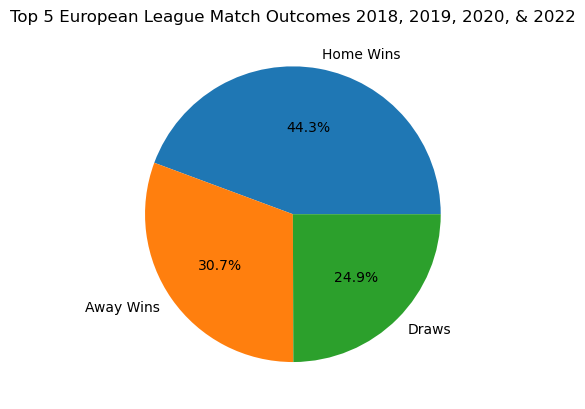

In [9]:
# Calculate % occurance of win/loss/draw
home_win_pct = (len(home_wins_df)/len(attendance_df['Home Score']))
away_win_pct = (len(away_wins_df)/len(attendance_df['Home Score']))
draw_pct = (len(draws_df)/len(attendance_df['Home Score']))

# Generate pie chart to display results
labels =  ['Home Wins', 'Away Wins', 'Draws']
values = home_win_pct, away_win_pct, draw_pct 

plt.title("Top 5 European League Match Outcomes 2018, 2019, 2020, & 2022")
plt.pie(values, labels=labels ,autopct='%1.1f%%')
plt.show()

In [10]:
# Get matches where attendance was 0 
covid_season_df = all_leagues_matches_cleaned_df.loc[all_leagues_matches_cleaned_df["Attendance"].isna()]
covid_season_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 1048 to 9736
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       2283 non-null   object 
 1   Wk           2235 non-null   float64
 2   Date         2283 non-null   object 
 3   Time         2283 non-null   object 
 4   Home         2283 non-null   object 
 5   Away         2283 non-null   object 
 6   Home Score   2283 non-null   object 
 7   Away Score   2283 non-null   object 
 8   xG Home      2274 non-null   float64
 9   xG Away      2274 non-null   float64
 10  Attendance   0 non-null      float64
 11  Venue        2283 non-null   object 
 12  Referee      2276 non-null   object 
 13  xG Diff      2274 non-null   float64
 14  Actual Diff  2283 non-null   float64
 15  League       1795 non-null   object 
 16  Round        116 non-null    object 
dtypes: float64(6), object(11)
memory usage: 321.0+ KB


In [11]:
# Get matches where home team won during 2020-2021 season
home_wins_2_df = covid_season_df.loc[covid_season_df["Home Score"] > covid_season_df["Away Score"], :]
len(home_wins_2_df)

916

In [12]:
# Get matches where away team won during 2020-2021 season
away_wins_2_df = covid_season_df.loc[covid_season_df["Home Score"] < covid_season_df["Away Score"], :]
len(away_wins_2_df)

802

In [13]:
# Get matches where home team won during 2020-2021 season
draws_2_df = covid_season_df.loc[covid_season_df["Home Score"] == covid_season_df["Away Score"], :]
len(draws_2_df)

565

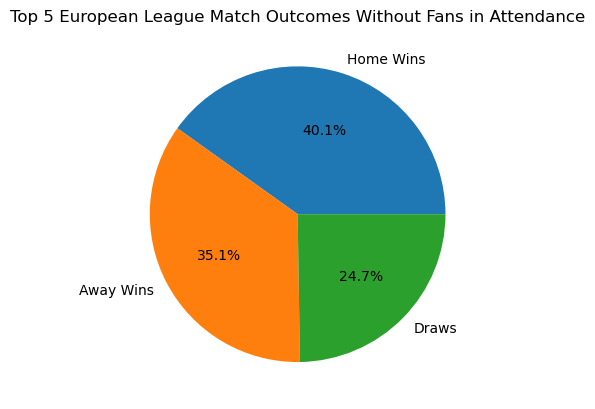

In [14]:
# Calculate % occurance of win/loss/draw
home_win_pct_2 = (len(home_wins_2_df)/len(covid_season_df['Home Score']))
away_win_pct_2 = (len(away_wins_2_df)/len(covid_season_df['Home Score']))
draw_pct_2 = (len(draws_2_df)/len(covid_season_df['Home Score']))

# Generate pie chart to display results
labels =  ['Home Wins', 'Away Wins', 'Draws']
values = home_win_pct_2, away_win_pct_2, draw_pct_2 

plt.title("Top 5 European League Match Outcomes Without Fans in Attendance")
plt.pie(values, labels=labels ,autopct='%1.1f%%')
plt.show()

In [15]:
# Take absolute value of 'Actual Diff' column
EPL_matches_df['Actual Diff'] = EPL_matches_df['Actual Diff'].abs()
LaLiga_matches_df['Actual Diff'] = LaLiga_matches_df['Actual Diff'].abs()
SerieA_matches_df['Actual Diff'] = SerieA_matches_df['Actual Diff'].abs()
Bundes_matches_df['Actual Diff'] = Bundes_matches_df['Actual Diff'].abs()
Ligue1_matches_df['Actual Diff'] = Ligue1_matches_df['Actual Diff'].abs()
UEFA_matches_df['Actual Diff'] = UEFA_matches_df['Actual Diff'].abs()

# Create variable for goal differential values for each league

EPL_margins = EPL_matches_df['Actual Diff'].unique()
LaLiga_margins = LaLiga_matches_df['Actual Diff'].unique()
SerieA_margins = LaLiga_matches_df['Actual Diff'].unique()
Bundes_margins = SerieA_matches_df['Actual Diff'].unique()
Ligue1_margins = Ligue1_matches_df['Actual Diff'].unique()
UEFA_margins = UEFA_matches_df['Actual Diff'].unique()

SerieA_margins

array([1., 0., 2., 3., 4., 5., 6.])

In [49]:
# Get summary stats for each league
EPL_sum_stats = EPL_matches_df['Actual Diff'].describe()
LaLiga_sum_stats = LaLiga_matches_df['Actual Diff'].describe()
SerieA_sum_stats = SerieA_matches_df['Actual Diff'].describe()
Bundes_sum_stats = Bundes_matches_df['Actual Diff'].describe()
Ligue1_sum_stats = Ligue1_matches_df['Actual Diff'].describe()
UEFA_sum_stats = UEFA_matches_df['Actual Diff'].describe()

EPL_sum_stats_df = pd.DataFrame(EPL_sum_stats)
LaLiga_sum_stats_df = pd.DataFrame(LaLiga_sum_stats)
SerieA_sum_stats_df = pd.DataFrame(SerieA_sum_stats)
Bundes_sum_stats_df = pd.DataFrame(Bundes_sum_stats)
Ligue1_sum_stats_df = pd.DataFrame(Ligue1_sum_stats)
UEFA_sum_stats_df = pd.DataFrame(UEFA_sum_stats)


In [16]:
# Calculate quartiles & U/L bounds for potential outliers
EPL_quartiles = EPL_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
EPL_Q1 = EPL_quartiles[0.25]
EPL_Q3 = EPL_quartiles[0.75]
EPL_IQR = EPL_Q3-EPL_Q1

EPL_upper_bound = EPL_Q3 + (EPL_IQR*1.5)
EPL_lower_bound = EPL_Q1 - (EPL_IQR*1.5)

print(EPL_upper_bound)
print(EPL_lower_bound)



3.5
-0.5


In [37]:
# Get matches where final score is considered an outlier
EPL_outliers = EPL_matches_df.loc[(EPL_matches_df['Actual Diff'] < EPL_lower_bound) | 
                                     (EPL_matches_df['Actual Diff'] > EPL_upper_bound), :]

len(EPL_outliers)

137

In [21]:
# Calculate quartiles & U/L bounds for potential outliers
LaLiga_quartiles = LaLiga_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
LaLiga_Q1 = LaLiga_quartiles[0.25]
LaLiga_Q3 = LaLiga_quartiles[0.75]
LaLiga_IQR = LaLiga_Q3-LaLiga_Q1

LaLiga_upper_bound = LaLiga_Q3 + (LaLiga_IQR*1.5)
LaLiga_lower_bound = LaLiga_Q1 - (LaLiga_IQR*1.5)

print(LaLiga_upper_bound)
print(LaLiga_lower_bound)

5.0
-3.0


In [38]:
# Get matches where final score is considered an outlier
LaLiga_outliers = LaLiga_matches_df.loc[(LaLiga_matches_df['Actual Diff'] < LaLiga_lower_bound) | 
                                     (LaLiga_matches_df['Actual Diff'] > LaLiga_upper_bound), :]

len(LaLiga_outliers)

6

In [23]:
# Calculate quartiles & U/L bounds for potential outliers
SerieA_quartiles = SerieA_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
SerieA_Q1 = SerieA_quartiles[0.25]
SerieA_Q3 = SerieA_quartiles[0.75]
SerieA_IQR = SerieA_Q3-SerieA_Q1

SerieA_upper_bound = SerieA_Q3 + (SerieA_IQR*1.5)
SerieA_lower_bound = SerieA_Q1 - (SerieA_IQR*1.5)

print(SerieA_upper_bound)
print(SerieA_lower_bound)

3.5
-0.5


In [39]:
# Get matches where final score is considered an outlier
SerieA_outliers = SerieA_matches_df.loc[(SerieA_matches_df['Actual Diff'] < SerieA_lower_bound) | 
                                     (SerieA_matches_df['Actual Diff'] > SerieA_upper_bound), :]

len(SerieA_outliers)

112

In [25]:
# Calculate quartiles & U/L bounds for potential outliers
Bundes_quartiles = Bundes_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
Bundes_Q1 = Bundes_quartiles[0.25]
Bundes_Q3 = Bundes_quartiles[0.75]
Bundes_IQR = Bundes_Q3-SerieA_Q1

Bundes_upper_bound = Bundes_Q3 + (Bundes_IQR*1.5)
Bundes_lower_bound = Bundes_Q1 - (Bundes_IQR*1.5)

print(Bundes_upper_bound)
print(Bundes_lower_bound)

3.5
-0.5


In [40]:
# Get matches where final score is considered an outlier
Bundes_outliers = Bundes_matches_df.loc[(Bundes_matches_df['Actual Diff'] < Bundes_lower_bound) | 
                                     (Bundes_matches_df['Actual Diff'] > Bundes_upper_bound), :]

len(Bundes_outliers)

139

In [ ]:
# Calculate quartiles & U/L bounds for potential outliers
Ligue1_quartiles = Ligue1_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
Ligue1_Q1 = Ligue1_quartiles[0.25]
Ligue1_Q3 = Ligue1_quartiles[0.75]
Ligue1_IQR = Ligue1_Q3-Ligue1_Q1

Ligue1_upper_bound = Ligue1_Q3 + (Ligue1_IQR*1.5)
Ligue1_lower_bound = Ligue1_Q1 - (Ligue1_IQR*1.5)

print(Ligue1_upper_bound)
print(Ligue1_lower_bound)

In [ ]:
# Get matches where final score is considered an outlier
Ligue1_outliers = Ligue1_matches_df.loc[(Ligue1_matches_df['Actual Diff'] < lower_bound) | 
                                     (Ligue1_matches_df['Actual Diff'] > upper_bound), :]

len(Ligue1_outliers)

In [27]:
# Calculate quartiles & U/L bounds for potential outliers
UEFA_quartiles = UEFA_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
UEFA_Q1 = UEFA_quartiles[0.25]
UEFA_Q3 = UEFA_quartiles[0.75]
UEFA_IQR = UEFA_Q3-UEFA_Q1

UEFA_upper_bound = UEFA_Q3 + (UEFA_IQR*1.5)
UEFA_lower_bound = UEFA_Q1 - (UEFA_IQR*1.5)

print(UEFA_upper_bound)
print(UEFA_lower_bound)

3.5
-0.5


In [41]:
# Get matches where final score is considered an outlier
UEFA_outliers = UEFA_matches_df.loc[(UEFA_matches_df['Actual Diff'] < UEFA_lower_bound) | 
                                     (UEFA_matches_df['Actual Diff'] > UEFA_upper_bound), :]

len(UEFA_outliers) 

66

In [42]:
# Determine how many UCL outliers occur in knockout stages vs group stages
UEFA_outliers_df = pd.DataFrame(UEFA_outliers)
UEFA_outliers_group_stages = UEFA_outliers_df.loc[(UEFA_outliers_df['Round'] == 'Group stage')]
len(UEFA_outliers_group_stages)                                      

57

(0.0, 10.0)

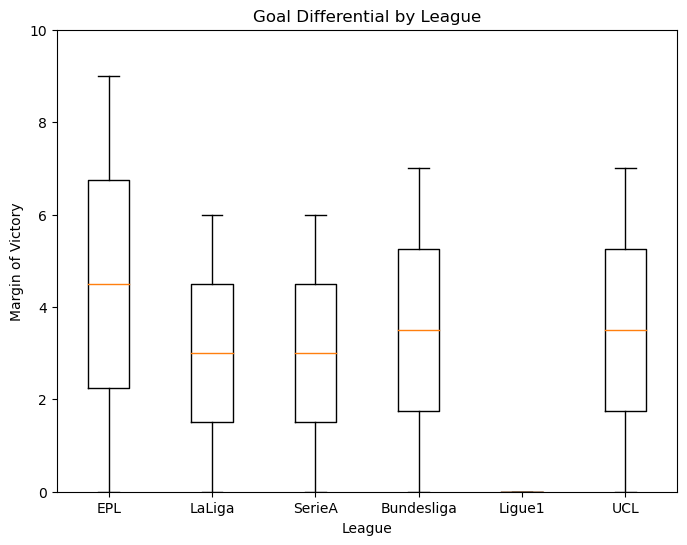

In [31]:
# Generate a box plot showing goal differential in every match over the past 5 years
data = [EPL_margins, LaLiga_margins, SerieA_margins, Bundes_margins, Ligue1_margins, UEFA_margins]
league= ['EPL', 'LaLiga','SerieA','Bundesliga', 'Ligue1', 'UCL']

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_title('Goal Differential by League')
ax1.set_ylabel('Margin of Victory')
ax1.set_xlabel('League')
ax1.boxplot(data, labels=league, widths = 0.4,vert=True)
plt.ylim(0, 10)

In [ ]:
sum_df

In [ ]:
# Groupby team name & get mean for all relevant variables
squads_grouped = sum_df.groupby(['Squad'])

mean_age = squads_grouped['Avg Age'].mean()
mean_wages = squads_grouped['Annual Wages ($)'].mean()
mean_poss = squads_grouped['Avg Poss'].mean()
mean_attendance = squads_grouped['Attendance'].mean()
mean_pts = squads_grouped['Pts'].mean()
mean_GF = squads_grouped['GF'].mean()
mean_GA = squads_grouped['GA'].mean()
mean_xG = squads_grouped['xG'].mean()
mean_xGA = squads_grouped['xGA'].mean()
mean_xGD = squads_grouped['xGD'].mean()
mean_GD = squads_grouped['GD'].mean()

In [ ]:
# Create dict to hold variables
mean_EPL_sum ={
    "Age": mean_age,
    "Possession": mean_poss,
    "Attendance": mean_attendance,
    "Points": mean_pts,
    "Goals For": mean_GF,
    "Goals Against": mean_GA,
    "xGoals For": mean_xG,
    "xGoals Against": mean_xGA,
    "Goal Differential": mean_GD,
    "xGoal Differential": mean_xGD,
    "Avg Wages": mean_wages}

# Create new df from dict
mean_EPL_sum_df = pd.DataFrame(mean_EPL_sum)

In [ ]:
# Round values to 2 decimal places & display df
mean_EPL_sum_df = mean_EPL_sum_df.round(2)
mean_EPL_sum_df

In [ ]:
# Calculate average dollars spent per point earned for each team
dollars_per_point = mean_EPL_sum_df['Avg Wages'] / mean_EPL_sum_df['Points']
print(dollars_per_point)

In [ ]:
# Plot Points vs Wages
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["Avg Wages"]
colors = np.random.rand(len(mean_EPL_sum_df["Points"]))
fig1, ax1 = plt.subplots()
plt.title('Points vs Wages')
plt.scatter(x_axis, y_axis,c=colors, cmap='viridis')
plt.xlabel('Points')
plt.ylabel('Wages ($)')

In [ ]:
# Plot points vs possession
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["Possession"]

fig1, ax1 = plt.subplots()
plt.title('Points vs Possession')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('Possession (%)')
plt.xlim(20,105)
plt.ylim(20,80)

In [ ]:
# Plot points vs xGoals Scored
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["xGoals For"]

fig1, ax1 = plt.subplots()
plt.title('Points vs xGoals Scored')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('xGoals For')
plt.xlim(20,105)
plt.ylim(20,100)

In [ ]:
# Plot points vs actual goals scored
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["Goals For"]

fig1, ax1 = plt.subplots()
plt.title('Points vs Goals Scored')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('Goals For')
plt.xlim(20,105)
plt.ylim(20,100)

In [ ]:
# Plot points vs xGoals Against
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["xGoals Against"]

fig1, ax1 = plt.subplots()
plt.title('Points vs xGoals Against')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('xGoals Against')
plt.xlim(20,105)
plt.ylim(20,100)

In [ ]:
# Plot points vs actual goals against
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["Goals Against"]

fig1, ax1 = plt.subplots()
plt.title('Points vs Goals Against')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('Goals Against')
plt.xlim(20,105)
plt.ylim(20,100)

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Avg Wages"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Avg Wages"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Wages ($)")
plt.title("Points vs Wages")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Possession"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Possession"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Possession")
plt.title("Points vs Possession")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals For"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals For"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("xGoals Scored")
plt.title("Points vs XGoals Scored")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals For"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals For"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Goals Scored")
plt.title("Points vs Goals Scored")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals Against"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals Against"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(30,36))
plt.xlabel("Points")
plt.ylabel("xGoals Against")
plt.title("Points vs XGoals Against")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals Against"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals Against"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(30,36))
plt.xlabel("Points")
plt.ylabel("Goals Against")
plt.title("Points vs Goals Against")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")